# Author: Sparsh Prakash
# Prediction using Unsupervised-ML
# TASK 2- GRIP JUNE 2023

The purpose of this Task is to apply K-means clustering to the famous 'Iris' dataset and predict the number of clusters present in the data. K-means clustering is an unsupervised machine learning algorithm that groups similar data points together based on their attributes. The 'Iris' dataset is a well-known dataset in the machine learning community and consists of measurements of various attributes of different Iris flower species.



## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

## Loading the iris dataset from sklearn
### About the Data-set
The 'Iris' dataset contains 150 instances, each representing an Iris flower sample. Each instance has four attributes: sepal length, sepal width, petal length, and petal width. The dataset is labeled with three different Iris species: Setosa, Versicolor, and Virginica. However, for this project, we will be performing unsupervised clustering, ignoring the labels.



In [ ]:
iris_data = datasets.load_iris()
iris_x_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_x_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Preprocessing


In [ ]:
iris_x_df.shape

(150, 4)

In [ ]:
iris_x_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [ ]:
iris_x_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
iris_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Determining the Number of Clusters:

- Explore the dataset and analyze the underlying structure to determine the appropriate number of clusters.
- Use elbow method to find the optimal number of clusters.
- Iterate through different values of k (number of clusters) and calculate the within-cluster sum of squares (WCSS) for each k.
- Choose the value of k that provides a good balance between minimizing WCSS and maximizing inter-cluster separation.


In [ ]:
from sklearn.cluster import KMeans
x = iris_x_df.iloc[:, :].values
wcss = []  #wcss stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++',
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcss.append(model.inertia_)

print(wcss)


[681.3706, 152.3479517603579, 78.851441426146, 57.22847321428572, 46.446182051282065, 39.03998724608726, 34.29971212121213, 30.06311061745273, 28.1241292610898, 26.09432474054042, 24.49239528673082, 22.713918404916978, 21.690983282068807, 20.04909138230191, 18.89824681020734, 17.90596073517127, 17.130082792207798, 16.466011600972134, 15.30529670329671, 14.90428907203907]


# Plotting the Result in line graph

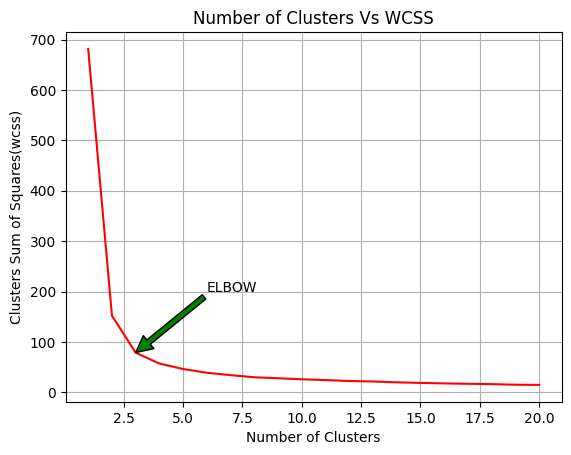

In [ ]:
plt.plot(range(1, 21), wcss, color = 'r')
plt.title('Number of Clusters Vs WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('Clusters Sum of Squares(wcss)')
plt.annotate('ELBOW', xytext=(6,200), xy=(3,79), arrowprops={'facecolor':'green'})
plt.grid()
plt.show()

#### Based on the exploration and analysis, it was determined that the optimal number of clusters for the 'Iris' dataset is 3. Using K-means clustering with k=3, the following results were obtained:



In [ ]:
model = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 250, n_init = 15, random_state = 0)
y = model.fit_predict(x)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Visualizing the Clusters:

   - Use scatter plots to visually represent the clusters.
   - Select two appropriate features (e.g., sepal length and petal width) to plot on the x and y axes.
   - Color-code the data points based on their assigned clusters.
   - Create a separate plot for each value of k to compare and evaluate the clustering results.


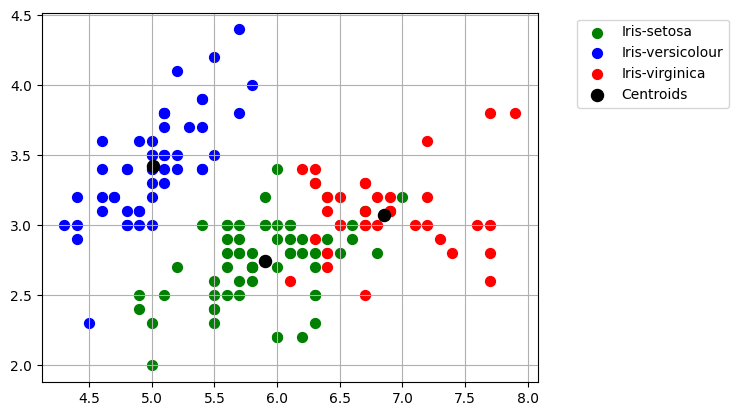

In [ ]:
# Plotting the three clusters of first two columns(sepal length, sepal width) of input Iris data
plt.scatter(x[y == 0, 0], x[y == 0, 1],
            s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1, 0], x[y == 1, 1],
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 0], x[y == 2, 1],
            s = 50, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],
            s = 75, c = 'black', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

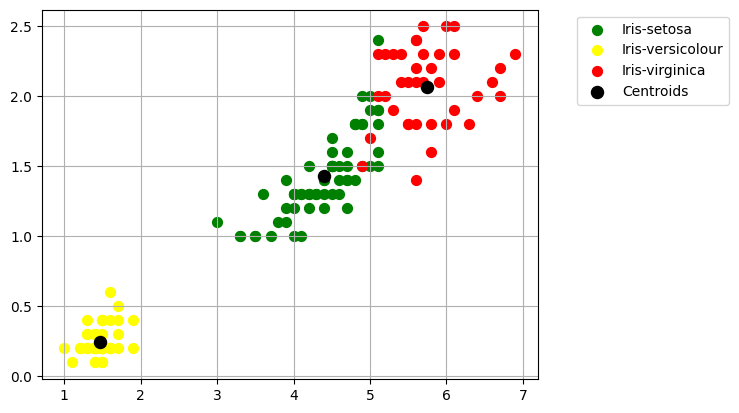

In [ ]:
# Plotting the three clusters of third and fourth columns(petal length, petal width) of Iris data
plt.scatter(x[y == 0, 2], x[y == 0, 3],
            s = 50, c = 'green', label = 'Iris-setosa')
plt.scatter(x[y == 1, 2], x[y == 1, 3],
            s = 50, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y == 2, 2], x[y == 2, 3],
            s = 50, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of each clusters
plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:,3],
            s = 75, c = 'black', label = 'Centroids')

plt.legend(loc=1, bbox_to_anchor= (1.4, 1))
plt.grid()

##Conclusion:

In this Task, we successfully applied K-means clustering to the 'Iris' dataset to predict the number of clusters and visually represent them. By analyzing the dataset and using appropriate evaluation metrics, it was determined that the optimal number of clusters for this dataset is 3. The clustering results were visualized, providing insights into the underlying patterns and relationships within the data.